## 1. Загрузка данных

In [329]:
import pandas as pd #импорт библиотек, которые потребуются
import numpy as np
import matplotlib.pyplot as plt
from io import StringIO
from IPython.display import Image

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (18,12)

from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [330]:
df = pd.read_csv('csv_dir/Titanic.csv')

In [331]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [332]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


## 2. Переобработка данных

In [333]:
df = pd.get_dummies(df, columns=['Embarked'])
df.loc[df['Age'].isnull(), 'Age'] = df['Age'].median()
y = df['Survived']
X = df.drop(["Survived", "Name", "PassengerId", "Ticket", "Cabin"], axis=1)
X["Sex"].replace(("female", "male"), (1, 0), inplace=True)


In [334]:
X.head(10)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,1
5,3,0,28.0,0,0,8.4583,0,1,0
6,1,0,54.0,0,0,51.8625,0,0,1
7,3,0,2.0,3,1,21.0750,0,0,1
8,3,1,27.0,0,2,11.1333,0,0,1
9,2,1,14.0,1,0,30.0708,1,0,0


In [335]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Pclass      891 non-null    int64  
 1   Sex         891 non-null    int64  
 2   Age         891 non-null    float64
 3   SibSp       891 non-null    int64  
 4   Parch       891 non-null    int64  
 5   Fare        891 non-null    float64
 6   Embarked_C  891 non-null    uint8  
 7   Embarked_Q  891 non-null    uint8  
 8   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 44.5 KB


In [336]:
from sklearn.preprocessing import StandardScaler

In [337]:
sc = StandardScaler()
sc.fit(X)
X = sc.transform(X)

In [338]:
X

array([[ 0.82737724, -0.73769513, -0.56573646, ..., -0.48204268,
        -0.30756234,  0.61930636],
       [-1.56610693,  1.35557354,  0.66386103, ...,  2.0745051 ,
        -0.30756234, -1.61470971],
       [ 0.82737724,  1.35557354, -0.25833709, ..., -0.48204268,
        -0.30756234,  0.61930636],
       ...,
       [ 0.82737724,  1.35557354, -0.1046374 , ..., -0.48204268,
        -0.30756234,  0.61930636],
       [-1.56610693, -0.73769513, -0.25833709, ...,  2.0745051 ,
        -0.30756234, -1.61470971],
       [ 0.82737724, -0.73769513,  0.20276197, ..., -0.48204268,
         3.25137334, -1.61470971]])

## 3. Машинное обучение по методу опорных векторов

In [339]:
from sklearn.model_selection import train_test_split
from sklearn import svm

In [340]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y, random_state=666)

In [341]:
model = svm.SVC()
model.fit(X_train, y_train)
predicted = model.predict(X_test)

In [342]:
from sklearn.metrics import plot_confusion_matrix

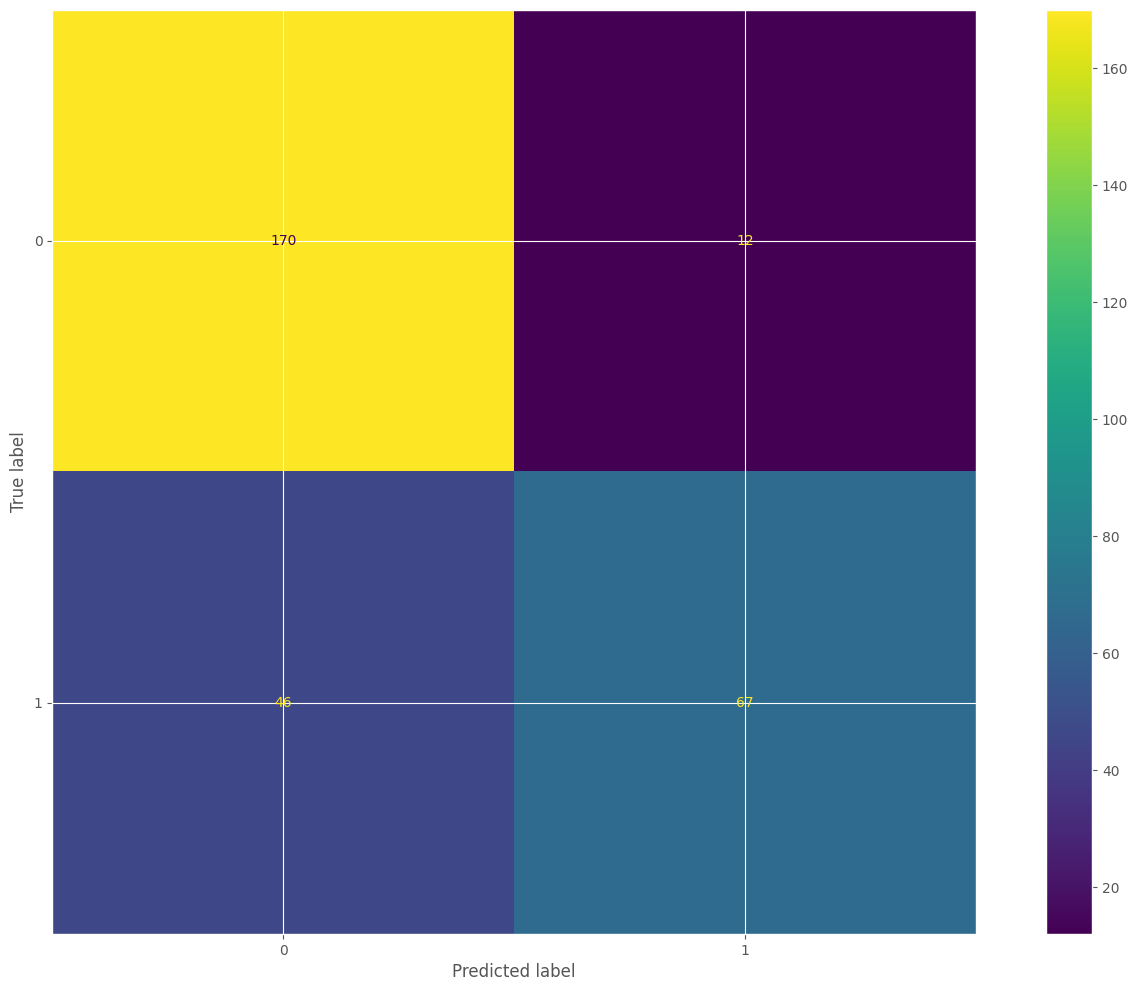

In [343]:
plot_confusion_matrix(model.fit(X_train, y_train), X_test, y_test)
plt.show()

In [344]:
from sklearn import metrics

In [345]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       182
           1       0.85      0.59      0.70       113

    accuracy                           0.80       295
   macro avg       0.82      0.76      0.78       295
weighted avg       0.81      0.80      0.79       295



## 3. Исследование влияния значения k на итоговый результат, с использованием 5-fold кросс-валидации

In [346]:
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedKFold

In [347]:
def research_of_influence_of_parameter(param_name, range_values, metric):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=666)
    train_scores, valid_scores = validation_curve(
      model,
      X,
      y,
      param_name=param_name,
      param_range=range_values,
      scoring=metric,
      cv=cv
    )

    train_score_mean = train_scores.mean(axis=1)
    train_score_std = train_scores.std(axis=1)
    valid_scores_mean = valid_scores.mean(axis=1)
    valid_scores_std = valid_scores.std(axis=1)

    plt.fill_between(range_values, train_score_mean-train_score_std, train_score_mean + train_score_std, color='b',
                        interpolate=True, alpha=0.5)
    plt.fill_between(range_values, valid_scores_mean-valid_scores_std, valid_scores_mean + valid_scores_std, color='r',
                        interpolate=True, alpha=0.5)

    plt.plot(range_values, train_score_mean, c='b', lw=2)
    plt.plot(range_values, valid_scores_mean, c='r', lw=2)

    plt.xlabel(param_name)
    plt.ylabel(metric)

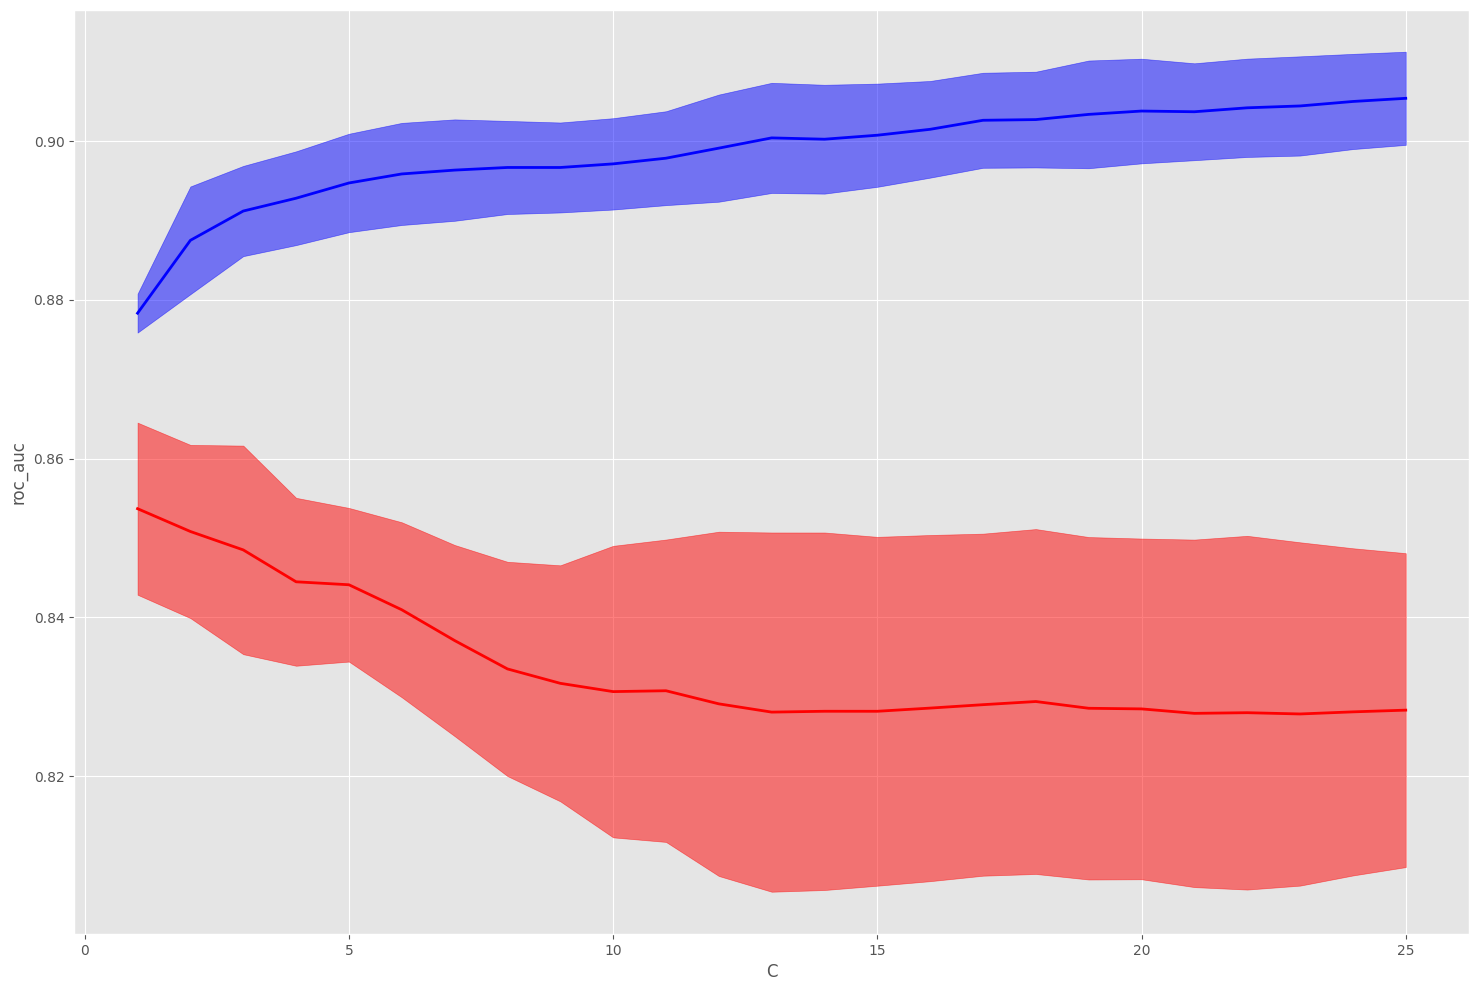

In [348]:
research_of_influence_of_parameter('C', range(1, 26), 'roc_auc')

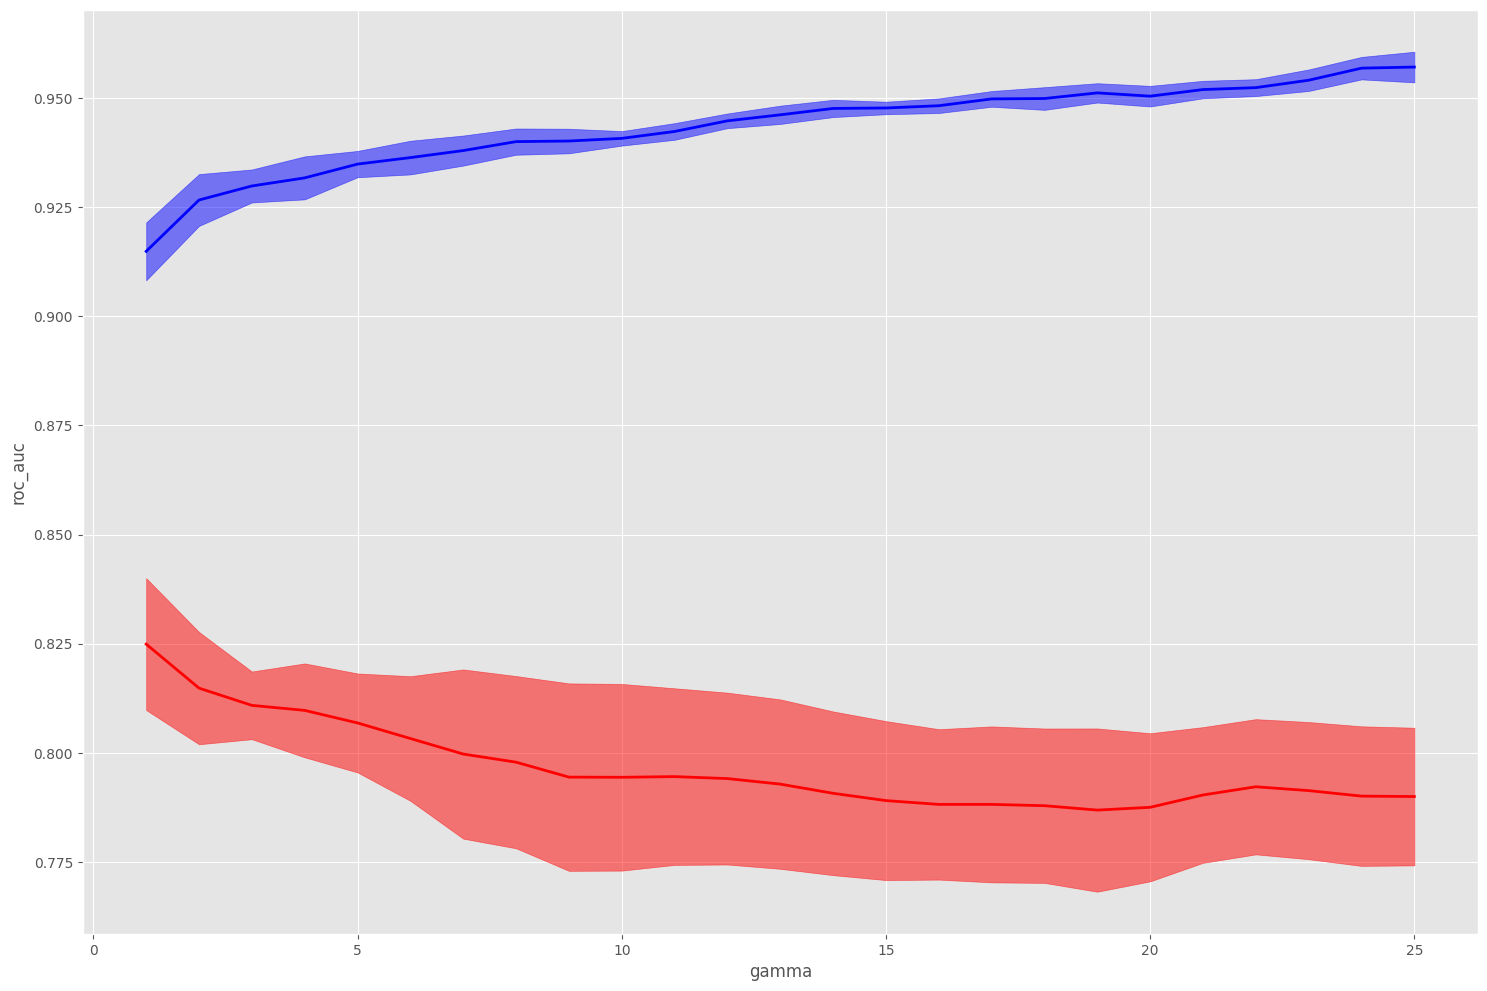

In [349]:
research_of_influence_of_parameter('gamma', range(1, 26), 'roc_auc')

In [350]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=666)

train_scores, valid_scores = validation_curve(
  model,
  X,
  y,
  param_name='gamma',
  param_range=['scale', 'auto'],
  scoring='roc_auc',
  cv=cv
)

print(train_scores.mean(axis=1))
print(valid_scores.mean(axis=1))

[0.87830572 0.87834775]
[0.85367912 0.85400022]


In [351]:
train_scores, valid_scores = validation_curve(
  model,
  X,
  y,
  param_name='kernel',
  param_range=['linear', 'poly', 'rbf','sigmoid'],
  scoring='roc_auc',
  cv=cv
)

print(train_scores.mean(axis=1))
print(valid_scores.mean(axis=1))

[0.81437943 0.87428134 0.87830572 0.7178228 ]
[0.81214141 0.82747756 0.85367912 0.72967386]


## Часть 4 - Параметры лучшей модели и конечный результат для использованной метрики

In [352]:
from sklearn.model_selection import GridSearchCV

In [353]:
model_params = model.get_params()
tuned_params = {}
for k, v in model_params.items():
    tuned_params[k] = [v]

tuned_params['C'] = range(1, 15)
tuned_params['kernel'] = ['linear', 'rbf', 'poly', 'sigmoid']
tuned_params['gamma'] = ['scale', 'auto']
tuned_params

{'C': range(1, 15),
 'break_ties': [False],
 'cache_size': [200],
 'class_weight': [None],
 'coef0': [0.0],
 'decision_function_shape': ['ovr'],
 'degree': [3],
 'gamma': ['scale', 'auto'],
 'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
 'max_iter': [-1],
 'probability': [False],
 'random_state': [None],
 'shrinking': [True],
 'tol': [0.001],
 'verbose': [False]}

In [354]:
clf = GridSearchCV(model, tuned_params, cv=cv, n_jobs=-1, scoring='roc_auc')
clf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=666, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': range(1, 15), 'break_ties': [False],
                         'cache_size': [200], 'class_weight': [None],
                         'coef0': [0.0], 'decision_function_shape': ['ovr'],
                         'degree': [3], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
                         'max_iter': [-1], 'probability': [False],
                         'random_state': [None], 'shrinking': [True],
                         'tol': [0.001], 'verbose': [False]},
             scoring='roc_auc')

In [355]:
best_params = clf.best_params_
print('Used params:', best_params)

Used params: {'C': 1, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'rbf', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [356]:
clf.best_score_ #конечный результат для использованной метрики

0.8533314911099307

In [357]:
best_params_model = svm.SVC(**best_params)
best_params_model.fit(X_train, y_train)
predict_best_params = best_params_model.predict(X_test)
print(metrics.classification_report(y_test, predict_best_params))

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       182
           1       0.85      0.59      0.70       113

    accuracy                           0.80       295
   macro avg       0.82      0.76      0.78       295
weighted avg       0.81      0.80      0.79       295



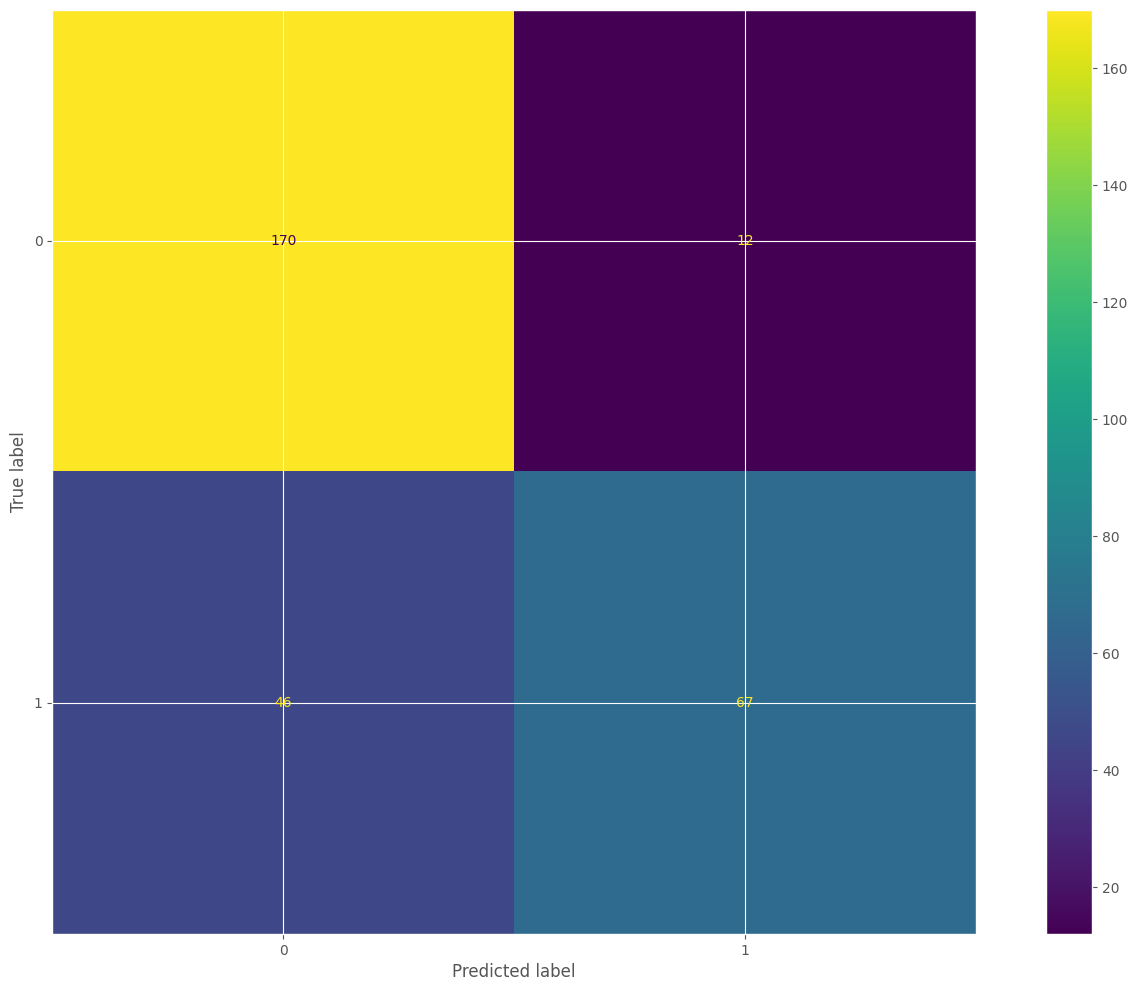

In [358]:
plot_confusion_matrix(best_params_model.fit(X_train, y_train), X_test, y_test)
plt.show()

In [359]:
print('Параметры модели по умолчанию')
model.get_params()
print('Параметры модели из 4 пункта')
best_params_model.get_params()

Параметры модели по умолчанию
Параметры модели из 4 пункта


{'C': 1,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [360]:
print('Модель из 2 пункта.')
print(metrics.classification_report(y_test, predicted))
print('Модель из 4 пункта.')
print(metrics.classification_report(y_test, predict_best_params))

Модель из 2 пункта.
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       182
           1       0.85      0.59      0.70       113

    accuracy                           0.80       295
   macro avg       0.82      0.76      0.78       295
weighted avg       0.81      0.80      0.79       295

Модель из 4 пункта.
              precision    recall  f1-score   support

           0       0.79      0.93      0.85       182
           1       0.85      0.59      0.70       113

    accuracy                           0.80       295
   macro avg       0.82      0.76      0.78       295
weighted avg       0.81      0.80      0.79       295

